# Data analysis for all data collected during our project
 

#### imports and  loading Data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from operator import itemgetter

dfQuick16 = pd.read_csv("CleanData/Quick-400runsClean-PC16.csv")

dfRead16 = pd.read_csv("CleanData/ReadCSVClean-PC16.csv")
dfQuick16.head()

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Input case,Size
0,4.396484,3.866089,0.213867,424.846,64.0,best,25000.0
1,4.326294,3.802795,0.212158,418.592,64.0,best,25000.0
2,4.566711,4.002136,0.215454,470.242,64.0,best,25000.0
3,4.493408,3.941650,0.214966,455.232,64.0,best,25000.0
4,4.564880,3.991516,0.213379,497.503,64.0,best,25000.0


In [2]:
dfRead16.head()

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Input case,Size
0,2.240601,1.966187,0.134399,227.880,53.0,random1,25000
1,2.062317,1.775085,0.126160,250.212,53.0,random1,25000
2,2.140869,1.876709,0.121887,222.526,53.0,random1,25000
3,2.217102,1.940735,0.133545,226.620,53.0,random1,25000
4,2.058533,1.796814,0.119385,219.516,53.0,random1,25000


In [9]:
def calcMean(df,type,size):
    meandf = df[df["Input case"] == type][df["Size"]==size].mean()
    meandf["Input case"] = type
    return meandf

def mean_of_dataset(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = ["best", "random1","random2","random3","random4","random5","random6","random7","random8","random9","random10",]
    l = []
    for case in c:
        if case != "worst":
            for size in s:
                l.append(calcMean(df, case, size))  
        else :
            for size in [25000,50000,75000,100000,200000,300000,400000,500000]:
                l.append(calcMean(df, case, size))   
    
    dfMeans = pd.concat([series.to_frame().T for series in l], ignore_index=True)
    return dfMeans

dfQuickMean16 = mean_of_dataset(dfQuick16)
dfQuickMean16.head()

C:\Users\langk\AppData\Local\Temp\ipykernel_14712\339099550.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_14712\339099550.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_14712\339099550.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_14712\339099550.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case
0,4.487542,3.926958,0.216488,463.748,64.0,25000.0,best
1,6.601036,5.777475,0.28219,737.899889,64.222222,50000.0,best
2,8.710063,7.640233,0.341715,994.701958,64.583333,75000.0,best
3,11.102143,9.739183,0.406585,1304.065926,65.111111,100000.0,best
4,19.523205,17.135195,0.650694,2389.13037,65.851852,200000.0,best


In [10]:

def list_of_case(df):
    l = []
    for i in range(len(df)):
        if df["Input case"].iloc[i] not in l:
            l.append(df["Input case"].iloc[i])
    return l


def mean_of_dataset_readCSV(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = list_of_case(df)
    l = []
    for case in range(len(c)):
        for size in range(len(s)):
            l.append(calcMean(df, c[case], s[size]))  

    dfMeans = pd.concat([series.to_frame().T  for series in l], ignore_index=True)
    return dfMeans

dfReadMean16 = mean_of_dataset_readCSV(dfRead16)


C:\Users\langk\AppData\Local\Temp\ipykernel_14712\339099550.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_14712\339099550.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_14712\339099550.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_14712\339099550.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid

In [11]:
dfQuickMean16 = dfQuickMean16.reset_index(drop=True)
dfReadMean16 = dfReadMean16.reset_index(drop=True)
dfQuickMean16.head()

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case
0,4.487542,3.926958,0.216488,463.748,64.0,25000.0,best
1,6.601036,5.777475,0.28219,737.899889,64.222222,50000.0,best
2,8.710063,7.640233,0.341715,994.701958,64.583333,75000.0,best
3,11.102143,9.739183,0.406585,1304.065926,65.111111,100000.0,best
4,19.523205,17.135195,0.650694,2389.13037,65.851852,200000.0,best


In [12]:
def getIndex(df,case,size):
    return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]

In [13]:
def deductReadFromAlg(meanC, meanR):
    lc = []
    lt = []
    lm = []

    for i in range(len(meanC["Size"])):
        case = meanC["Input case"][i]
        size = meanC["Size"][i]
        if case == "best":
            case2 = "quickbest"
        if case == "worst":
            case2 = "reversesorted"
        if case.startswith("random"):
            case2 = "random"+case.split("m")[-1]

        Cc = meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"].index.tolist()[0]]
        Rc = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"].index.tolist()[0]]
        lc.append((Cc-Rc)/400)

        Ct = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"].index.tolist()[0]]
        Rt = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time (ms)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time (ms)"].index.tolist()[0]]
        lt.append((Ct-Rt)/400)

        Cm = meanC[meanC["Input case"] == case][meanC["Size"]==size]["DRAM (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["DRAM (J)"].index.tolist()[0]]
        Rm = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["DRAM (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["DRAM (J)"].index.tolist()[0]]
        lm.append((Cm-Rm)/400)

    meanC["CPU - readCSV"] = lc
    meanC["Time - readCSV"] = lt
    meanC["Memory - readCSV"] = lm


deductReadFromAlg(dfQuickMean16, dfReadMean16)




best


C:\Users\langk\AppData\Local\Temp\ipykernel_14712\316818706.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Cc = meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"].index.tolist()[0]]
C:\Users\langk\AppData\Local\Temp\ipykernel_14712\316818706.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Rc = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"].index.tolist()[0]]
C:\Users\langk\AppData\Local\Temp\ipykernel_14712\316818706.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Ct = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"].index.tolist()[0]]
C:\Users\langk\AppData\Local\Temp\ipykernel_14712\316818706.py:23: UserWarning: Boole

best
best
best
best
best
best
best
best
best
best
best
best
random1
random1
random1
random1
random1
random1
random1
random1
random1
random1
random1
random1
random1
random2
random2
random2
random2
random2
random2
random2
random2
random2
random2
random2
random2
random2
random3
random3
random3
random3
random3
random3
random3
random3
random3
random3
random3
random3
random3
random4
random4
random4
random4
random4
random4
random4
random4
random4
random4
random4
random4
random4
random5
random5
random5
random5
random5
random5
random5
random5
random5
random5
random5
random5
random5
random6
random6
random6
random6
random6
random6
random6
random6
random6
random6
random6
random6
random6
random7
random7
random7
random7
random7
random7
random7
random7
random7
random7
random7
random7
random7
random8
random8
random8
random8
random8
random8
random8
random8
random8
random8
random8
random8
random8
random9
random9
random9
random9
random9
random9
random9
random9
random9
random9
random9
random9
random9
rand

# PLOTS

In [14]:
# For bubblesort: polynomial regression
def polyReg(SeriesX, SeriesY,dg, Label, color, plotLabel = True, regLine=True, printR2Score = True, plotGraph = True, dots="o"):
    X = SeriesX.values.reshape(SeriesX.size, -1)
    y = SeriesY.values

    fitness = []
   #for dg in range(minDegrees, maxDegrees):
    # Create an empty polynomial function with degree of 4
    poly_reg = PolynomialFeatures(degree=dg)
    
    # Fit the function to the X and transform X to the polynomial format
    X_poly = poly_reg.fit_transform(X)

    # Now we construct a Multiple Linear Regressor on the transformed X_ploy
    lr_2 = LinearRegression()  
    lr_2.fit(X_poly, y)  
    
    # Get the y values using the constructed Multiple Linear Regressor
    y_poly = lr_2.predict(X_poly)
    
    r2 = metrics.r2_score(y,y_poly)
    #if printR2Score:
    #    print(f"r2_score for {Label} {dg} is: {r2}")
    fitness.append((f"poly {dg}dg", r2, y_poly))
    #print(f"Parameters of poly: {poly_reg.get_params()}") #does not give what we are looking for
    
    if plotGraph:
        plt.plot(X, y,dots, color=color,markersize=10)
        if regLine:
            plt.plot(X, y_poly, color=color, linewidth=2)
        #plt.legend(loc='upper left')
    #print(lr_2.intercept_, lr_2.coef_)
    return max(fitness,key=itemgetter(1))

In [16]:
import math
def calcPercent(df):
    cpuPercent = []
    pkgPercent = []
    fullEC = []
    nlogn = []
    n2 = []
    for case in ["best", "random"]:
        if case == "best":
            for size in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
                cpuPercent.append(df["CPU (J)"][getIndex(df,case,size)] / df["PKG (J)"][getIndex(df,case,size)] * 100)
                pkgPercent.append(100)
                fullEC.append(df["CPU - readCSV"][getIndex(df,case,size)]+df["Memory - readCSV"][getIndex(df,case,size)])
                nlogn.append(df["Size"][getIndex(df,case,size)] * math.log2(df["Size"][getIndex(df,case,size)]))
                n2.append(df["Size"][getIndex(df,case,size)] * df["Size"][getIndex(df,case,size)])
        elif case == "worst":
            for size in [25000,50000,75000,100000,200000,300000,400000,500000]:
                cpuPercent.append(df["CPU (J)"][getIndex(df,case,size)] / df["PKG (J)"][getIndex(df,case,size)] * 100)
                pkgPercent.append(100)
                fullEC.append(df["CPU - readCSV"][getIndex(df,case,size)]+df["Memory - readCSV"][getIndex(df,case,size)])
                nlogn.append(df["Size"][getIndex(df,case,size)] * math.log2(df["Size"][getIndex(df,case,size)]))
                n2.append(df["Size"][getIndex(df,case,size)] * df["Size"][getIndex(df,case,size)])
        else :
            for i in range(1,11):
                for size in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
                    cpuPercent.append(df["CPU (J)"][getIndex(df,case+str(i),size)] / df["PKG (J)"][getIndex(df,case+str(i),size)] * 100)
                    pkgPercent.append(100)
                    fullEC.append(df["CPU - readCSV"][getIndex(df,case+str(i),size)]+df["Memory - readCSV"][getIndex(df,case+str(i),size)])
                    nlogn.append(df["Size"][getIndex(df,case+str(i),size)] * math.log2(df["Size"][getIndex(df,case+str(i),size)]))
                    n2.append(df["Size"][getIndex(df,case+str(i),size)] * df["Size"][getIndex(df,case+str(i),size)])

    df["CPU % of PKG"] = cpuPercent
    df["PKG %"] = pkgPercent
    df["full EC"] = fullEC
    df["nlog(n)"] = nlogn 
    df["n^2"] = n2
calcPercent(dfQuickMean16)
dfQuickMean16.head()

C:\Users\langk\AppData\Local\Temp\ipykernel_14712\2661346545.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]


,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case,CPU - readCSV,Time - readCSV,Memory - readCSV,CPU % of PKG,PKG %,full EC,nlog(n),n^2
0,4.487542,3.926958,0.216488,463.748,64.0,25000.0,best,0.005554,0.661471,0.000257,87.507991,100,0.005811,3.652410e+05,6.250000e+08
1,6.601036,5.777475,0.28219,737.899889,64.222222,50000.0,best,0.009136,1.228929,0.000349,87.523762,100,0.009485,7.804820e+05,2.500000e+09
2,8.710063,7.640233,0.341715,994.701958,64.583333,75000.0,best,0.012666,1.777088,0.000426,87.717318,100,0.013092,1.214595e+06,5.625000e+09
3,11.102143,9.739183,0.406585,1304.065926,65.111111,100000.0,best,0.017166,2.472748,0.000544,87.723449,100,0.017710,1.660964e+06,1.000000e+10
4,19.523205,17.135195,0.650694,2389.13037,65.851852,200000.0,best,0.033809,4.974917,0.001063,87.768353,100,0.034871,3.521928e+06,4.000000e+10


In [18]:
# print(max(dfQuickMean16[dfQuickMean16["Input case"] == f"worst"]["Time - readCSV"]))

random0 R2 0.9976305357521688  

random1 R2 0.9992502056494754  

random2 R2 0.9983567919286522  

random3 R2 0.9961561952643639  

random4 R2 0.9988643126323911  

random5 R2 0.9983769154854519  

random6 R2 0.9972107537961894  

random7 R2 0.9983756562510332  

random8 R2 0.998683691384498  

random9 R2 0.9988783256561219  

best R2  0.9983530355828002 



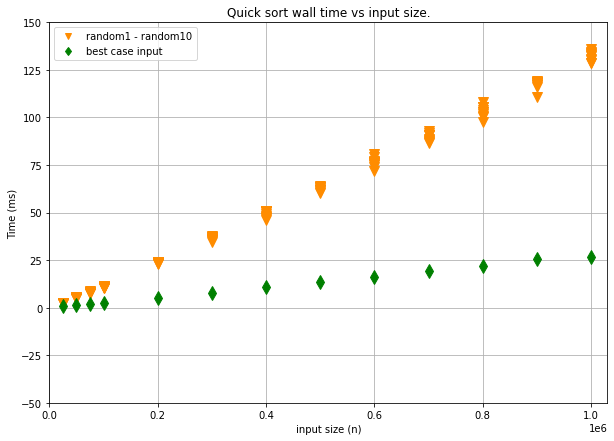

In [41]:
plt.figure(figsize=(10,7))
color = "red"
plt.plot(0,-111110,"v", color="darkorange",label="random1 - random10")
plt.plot(0,-1111100,"d", color="green",label="best case input")
# plt.plot(0,-1111100,"s", color="fuchsia",label="worst case input")

Rs = []

for i in range(1,11):
    Rs.append(polyReg(dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["Time - readCSV"],1, f"random{i} case input", "darkorange",dots="v", regLine=False))
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
#worst = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for worst case input", "fuchsia",dots="s", regLine=False)
best = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "best"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "green",dots="d", regLine=False)
#print(f"worst R2 ", worst[1], "\n")
print(f"best R2 ", best[1], "\n")
plt.title("Quick sort wall time vs input size.")
plt.xlabel("input size (n)")
plt.ylabel("Time (ms)")
plt.grid()
plt.legend()
plt.xlim(-10,1030000)
plt.ylim(-50,150)
plt.show()


# SQ 2: Time vs. big-oh

random0 R2 0.9990045798032399  

random1 R2 0.9992327974199863  

random2 R2 0.9994532300289706  

random3 R2 0.9972555381021101  

random4 R2 0.9994471965910765  

random5 R2 0.9990872457821737  

random6 R2 0.9979373534224064  

random7 R2 0.9982702548115961  

random8 R2 0.9992740308986445  

random9 R2 0.9989210557588849  

best R2  0.9981625344255122 



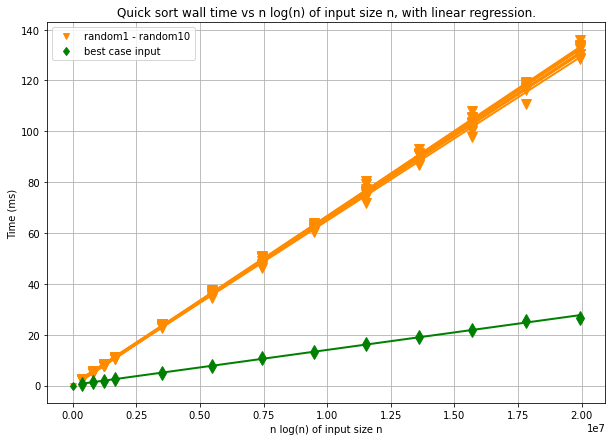

In [34]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

for i in range(1,11):
    Rs.append(polyReg(dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["nlog(n)"], dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["Time - readCSV"],1, f"random{i} case input", "darkorange",dots="v"))
plt.plot(0,0,"v", color="darkorange",label="random1 - random10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
#worst = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["n^2"], dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for worst case input", "fuchsia",dots="s")
#plt.plot(0,0,"s", color="fuchsia",label="worst case input")
best = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "best"]["nlog(n)"], dfQuickMean16[dfQuickMean16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "green",dots="d", regLine=True)
plt.plot(0,0,"d", color="green",label="best case input")
#print(f"worst R2 ", worst[1], "\n")
print(f"best R2 ", best[1], "\n")
plt.title("Quick sort wall time vs n log(n) of input size n, with linear regression.")
plt.xlabel("n log(n) of input size n")
plt.ylabel("Time (ms)")
plt.grid()
plt.legend()
plt.show()


# E v. T

random0 R2 0.9999722788509426  

random1 R2 0.9999867305791522  

random2 R2 0.999970580570141  

random3 R2 0.999926294519992  

random4 R2 0.9999753742170941  

random5 R2 0.9999547079400963  

random6 R2 0.9999299016164044  

random7 R2 0.9999865113001994  

random8 R2 0.9999638551108863  

random9 R2 0.9999631790299023  



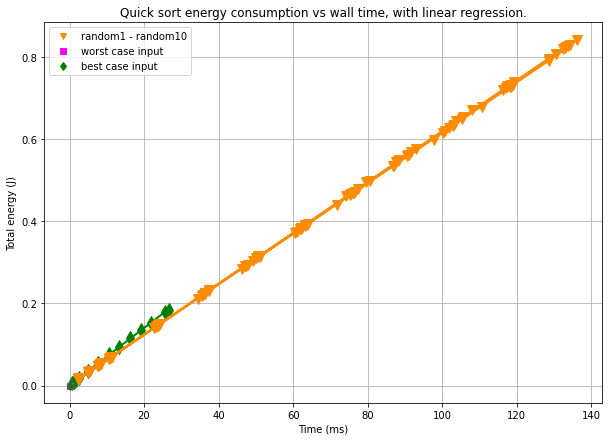

In [26]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

# worst = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["Time - readCSV"], dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s")
best = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "best"]["Time - readCSV"], dfQuickMean16[dfQuickMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d")
for i in range(1,11):
    Rs.append(polyReg(dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["Time - readCSV"], dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "darkorange",dots="v"))
plt.plot(0,0,"v", color="darkorange",label="random1 - random10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
plt.plot(0,0,"s", color="fuchsia",label="worst case input")
# print(f"worst R2 ", worst[1], "\n")
plt.plot(0,0,"d", color="green",label="best case input")
#print(f"best R2 ", best[1], "\n")
plt.title("Quick sort energy consumption vs wall time, with linear regression.")
plt.ylabel("Total energy (J)")
plt.xlabel("Time (ms)")
plt.legend()
plt.grid()
plt.show()


random0 R2 0.9999722788509426  

random1 R2 0.9999867305791522  

random2 R2 0.999970580570141  

random3 R2 0.999926294519992  

random4 R2 0.9999753742170941  

random5 R2 0.9999547079400963  

random6 R2 0.9999299016164044  

random7 R2 0.9999865113001994  

random8 R2 0.9999638551108863  

random9 R2 0.9999631790299023  

best R2  0.9998983351002083 



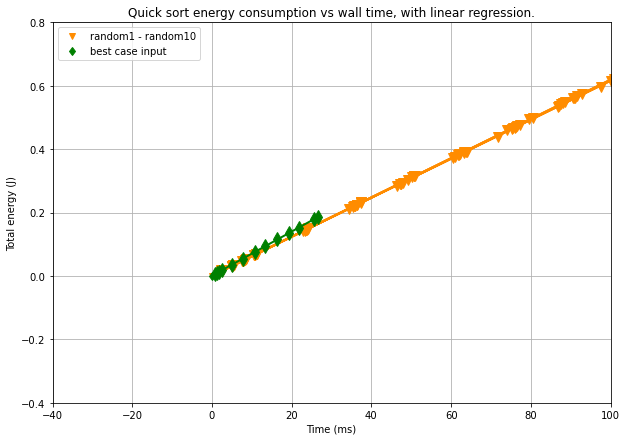

In [35]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

# worst = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["Time - readCSV"], dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s")
for i in range(1,11):
    Rs.append(polyReg(dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["Time - readCSV"], dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "darkorange",dots="v"))
plt.plot(0,0,"v", color="darkorange",label="random1 - random10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
#plt.plot(0,0,"s", color="fuchsia",label="worst case input")
# print(f"worst R2 ", worst[1], "\n")
plt.plot(0,0,"d", color="green",label="best case input")
best = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "best"]["Time - readCSV"], dfQuickMean16[dfQuickMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d",regLine=True)
print(f"best R2 ", best[1], "\n")
plt.title("Quick sort energy consumption vs wall time, with linear regression.")
plt.ylabel("Total energy (J)")
plt.xlabel("Time (ms)")
plt.legend(loc ="upper left")
plt.grid()
plt.xlim(-40,100)
plt.ylim(-.4,.8)
plt.show()


# EC v. big-oh

random0 R2 0.9988945831101703  

random1 R2 0.9990715560758515  

random2 R2 0.9992942765314848  

random3 R2 0.996371686272616  

random4 R2 0.9994703303825512  

random5 R2 0.9990462667601583  

random6 R2 0.9973708193881528  

random7 R2 0.9981161546973972  

random8 R2 0.9991997855875592  

random9 R2 0.9985975168826764  

best R2  0.9974387958055995 



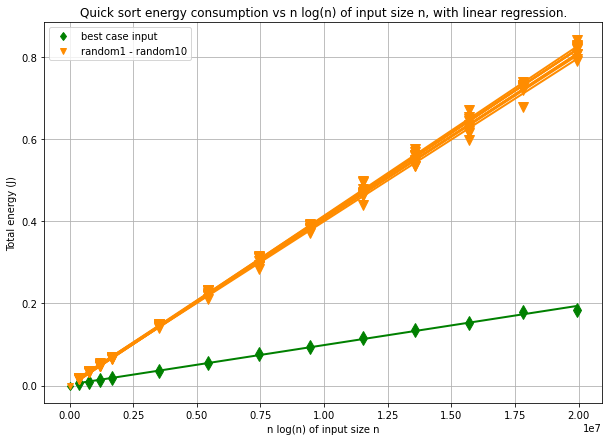

In [32]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

best = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "best"]["nlog(n)"], dfQuickMean16[dfQuickMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d",regLine=True)
plt.plot(0000,0000,"d", color="green",label="best case input")
for i in range(1,11):
    Rs.append(polyReg(dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["nlog(n)"], dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "darkorange",dots="v"))
plt.plot(0000,0000,"v", color="darkorange",label="random1 - random10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
# worst = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["n^2"], dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s")
#plt.plot(0000,0000,"s", color="fuchsia",label="worst case input")
# print(f"worst R2 ", worst[1], "\n")
print(f"best R2 ", best[1], "\n")
plt.title("Quick sort energy consumption vs n log(n) of input size n, with linear regression.")
plt.xlabel("n log(n) of input size n")
plt.ylabel("Total energy (J)")
plt.grid()
plt.legend()
plt.show()

random0 R2 0.9973701987502978  

random1 R2 0.9990810169685957  

random2 R2 0.9980054292860704  

random3 R2 0.9951796535452435  

random4 R2 0.998820373079689  

random5 R2 0.9981775750995502  

random6 R2 0.9966115572154722  

random7 R2 0.998165468246672  

random8 R2 0.9984266581384391  

random9 R2 0.9985465957309183  

best R2  0.9978153852388456 



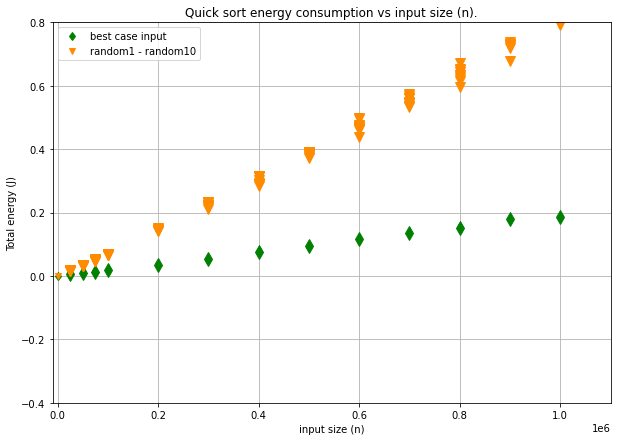

In [37]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

best = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "best"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d",regLine=False)
plt.plot(0000,0000,"d", color="green",label="best case input")
for i in range(1,11):
    Rs.append(polyReg(dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "darkorange",dots="v",regLine=False))
plt.plot(0000,0000,"v", color="darkorange",label="random1 - random10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
# worst = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s",regLine=False)
#plt.plot(0000,0000,"s", color="fuchsia",label="worst case input")
# print(f"worst R2 ", worst[1], "\n")
print(f"best R2 ", best[1], "\n")
plt.title("Quick sort energy consumption vs input size (n).")
plt.xlabel("input size (n)")
plt.ylabel("Total energy (J)")
plt.grid()
plt.xlim(-10000,1100000)
plt.ylim(-0.4, 0.8)
plt.legend()
plt.show()

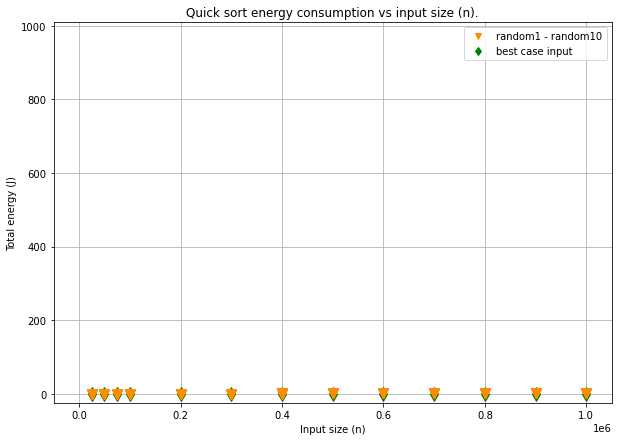

In [38]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []
plt.plot(0000,-10000,"v", color="darkorange",label="random1 - random10")
plt.plot(0000,-10000,"d", color="green",label="best case input")
# plt.plot(0000,-10000,"s", color="fuchsia",label="worst case input")

# worst = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s",regLine=False)
best = polyReg(dfQuickMean16[dfQuickMean16["Input case"] == "best"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d",regLine=False)
for i in range(1,11):
    Rs.append(polyReg(dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["Size"], dfQuickMean16[dfQuickMean16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "darkorange",dots="v",regLine=False))
# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
# print(f"worst R2 ", worst[1], "\n")
# print(f"best R2 ", best[1], "\n")
plt.title("Quick sort energy consumption vs input size (n).")
plt.xlabel("Input size (n)")
plt.ylabel("Total energy (J)")
plt.grid()
plt.legend()
plt.ylim(-25, 1010)
plt.show()